In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 모든 열 보기 설정
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.0f}'.format
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('final_결측치제거2.csv',encoding='utf-8')
df

,기준년월,가명식별자,외감구분,설립일자,종업원수,주소지시군구,유동자산,비유동자산,당좌자산,재고자산,유형자산,재공품,현금,현금등가물,상품유가증권,현금성자산,매출채권,매출채권(전기),매출채권처분손실(당기),무형자산,투자자산,자산총계,자산총계(전기),유동부채,단기차입금,차입금,매입채무,비유동부채,부채총계,자기자본(납입자본금),자본잉여금,납입자본,이익잉여금,자본조정,기타포괄손익누계액,유보금,자본총계,전기자본총계,매출액,전기매출액,매출원가,매출총이익,판매비와관리비,법인세비용차감전 순이익,전기법인세차감전순이익,법인세,계속사업이익,중단산업손익,금융비용,영업손익,전기영업이익,영업외수익,영업외비용,법인세차감전순이익,당기순이익,당기순이익(전기),현금흐름,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,부채상환계수,영업이익이자보상배율,이자비용,사채이자(당기),이자보상배율,적립금비율,EBIT,EBITDA,청산가치율,청산가치,순운전자본,순차입금,재무비율_총자산증가율,재무비율_부채비율,재무비율_자기자본비율,재무비율_유동비율,재무비율_차입금의존도,재무비율_매출액증가율,재무비율_영업이익율,재무비율_당기순이익율,재무비율_매출원가율,재무비율_판관비율,재무비율_자기자본이익률(ROE),재무비율_매출채권회전율,재무비율_재고자산회전율,재무비율_매입채무회전율,재무비율_총자산회전율,재무비율_총자산순이익률,재무비율_유동자산증가율,재무비율_유형자산증가율,단기차입금의존도,당좌비율,순차입금비율,순운전자본회전율,총자본회전율,자기자본순이익율,매출총이익율,EBITDA마진율,영업이익증가율,당기순이익증가율,EBITDA증가율,OCF/매출액비용,부채상환계수.1,차입금/EBITDA,EBITDA/금융비용,사업장소유여부,소유건축물건수,소유건축물실거래가합계,사업장권리침해여부,소유건축물권리침해여부,기업신용공여연체과목수(일보)(미해제),기업신용공여연체과목수(일보)(3개월내유지)(해제포함),기업신용공여연체과목수(일보)(6개월내유지)(해제포함),기업신용공여연체과목수(일보)(1년내유지)(해제포함),기업신용공여연체과목수(일보)(3년내유지)(해제포함),기업신용공여연체과목수(일보)(3개월내발생)(해제포함),기업신용공여연체과목수(일보)(6개월내발생)(해제포함),기업신용공여연체과목수(일보)(1년내발생)(해제포함),기업신용공여연체과목수(일보)(3년내발생)(해제포함),기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함),기업신용공여연체과목수(일보)(6개월내유지)(연체일수30일이상)(해제포함),기업신용공여연체과목수(일보)(1년내유지)(연체일수30일이상)(해제포함),기업신용공여연체과목수(일보)(3년내유지)(연체일수30일이상)(해제포함),기업신용공여30일이상연체과목수(일보)(해제포함),기업신용공여30일이상연체과목수(일보)(미해제),기업신용공여30일이상연체과목수(일보)(이자연체)(해제포함),기업신용공여30일이상연체과목수(일보)(이자연체)(미해제),기업신용공여연체기관수(일보)(미해제),기업신용공여30일이상연체기관수(일보)(해제포함),기업신용공여30일이상연체기관수(일보)(미해제),기업신용공여30일이상연체기관수(일보)(연체)(해제포함),기업신용공여30일이상연체기관수(일보)(이자연체)(미해제),기업신용공여연체기관수(일보)(3개월내유지)(연체일수30일이상)(해제포함),기업신용공여연체기관수(일보)(6개월내유지)(연체일수30일이상)(해제포함),기업신용공여연체기관수(일보)(1년내유지)(연체일수30일이상)(해제포함),기업신용공여연체기관수(일보)(3년내유지)(연체일수30일이상)(해제포함),기업신용공여연체최장연체일수(일보)(3개월내유지)(해제포함),기업신용공여연체최장연체일수(일보)(6개월내유지)(해제포함),기업신용공여연체최장연체일수(일보)(1년내유지)(해제포함),기업신용공여연체최장연체일수(일보)(3년내유지)(해제포함),기업신용공여연체최장연체일수(일보)(5년내유지)(해제포함),기업신용공여연체최장연체일수(일보)(3개월내발생)(해제포함),기업신용공여연체최장연체일수(일보)(6개월내발생)(해제포함),기업신용공여연체최장연체일수(일보)(1년내발생)(해제포함),기업신용공여연체최장연체일수(일보)(3년내발생)(해제포함),기업신용공여연체최장연체일수(일보)(5년내발생)(해제포함),신용도판단공공정보건수(CIS)(5년내발생)(해제포함),신용도판단정보공공정보건수(CIS)(미해제),신용도판단정보공공정보건수(관련인제외)(CIS)(당월유지)(해제포함),"공공정보(국세,지방세,관세체납)건수(CIS)(미해제)","공공정보(국세,지방세,관세체납)건수(CIS)(5년내발생)","공공정보(국세,지방세,관세체납,고용산재체납)건수(CIS)(미해제)","공공정보(국세,지방세,관세체납,고용산재체납)건수(CIS)(5년내발생)","신용도판단정보공공정보최근발생일자로부터경과일수(CIS)(해제,삭제)","신용도판단정보공공정보최근해제일자로부터경과일수(CIS)(해제,삭제)",기업신용평가등급(구간화),모형개발용Performance(향후1년내부도여부),업종(대분류),시도코드,시도명,시군구코드,시군구명
0,20210801,41294,1,20020830,63,11680,4406362501,2643245525,1684771733,2721590768,2126501078,67852456,0,0,0,24565275,515949640,909118333,0,0,478016874,7049608026,6735311108,1778620149,676428759,998606328,0,61218398,1839838547,256895000,0,256895000,2421662507,-12293178,-9379458,2421662507,2656884871,2425963213,2717487867,1790577446,1578601892,1138885975,154266460,984619515,253882089,59513932,926612530,0,31406384,984619515,253882089,96963470,95456523,986126462,926612530,664204007,-477677468,360587698,-1178644105,340378939,5,1,32788480,0,1,934,861217368,970761099,93,6532863579,2627742352,730196664,4,69,38,248,32,52,36,34,58,6,0,4,1,0,0,13,0,59,10,95,27,1,1,36,42,37,288,40,140,13,5,0,31,0,1595,39792889,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,999999999,999999999,4,0,부동산업,11,서울,680,강남구
1,20210801,100835,1,19850611,83,26170,1164149495,1211537593,178680349,985469146,1169589394,513029733,0,0,0,155910121,103544408,78096218,0,10366475,24032329,2375687088,2200605429,827091918,241416690,1409106858,84639004,804813397,1631905315,491000000,699170838,1190170838,251317068,0,-43552379,950487906,1397935527,1244231852,328029271,391473814,109359674,218669597,190070756,28598841,-9616467,-12035958,-87388699,0,47296386,28598841,-9616467,146863216,274886714,-99424657,-87388699,-106243560,-198191179,-19098050,-234699489,55606360,16,1,44693779,0,1,185,-96912068,159474035,98,2333738889,337057577,1170972000,7,117,59,141,33,-16,9,-27,33,58,-0,4,0,19,0,-4,0,-14,10,22,84,1,0,-7,67,23,-397,-18,-856,-6,16,0,3,0,99,3266777,0,0,0,0,0,0,0,0,0,0,0,0,

In [3]:
usecols = [
    '기준년월',
    '가명식별자',
    '시도명',
    '시군구명',
    '업종(대분류)',

    # 현금 및 자산 관련
    '현금',
    '현금흐름',
    '영업활동현금흐름',
    '재무활동현금흐름',
    '유동자산',
    '비유동자산',
    '자산총계',
    '자산총계(전기)',

    # 부채/자본
    '유동부채',
    '단기차입금',
    '부채총계',
    '자기자본(납입자본금)',
    '이익잉여금',

    # 이익 및 손익
    'EBIT',
    'EBITDA',
    '영업손익',
    '당기순이익',
    '이자비용',

    # 재무비율
    '재무비율_부채비율',
    '재무비율_유동비율',
    '이자보상배율',
    '차입금/EBITDA',
    'EBITDA/금융비용',

    # 매출 관련
    '매출액',
    '전기매출액',

    # 증가율 지표
    '영업이익증가율',
    '당기순이익증가율',
    'EBITDA증가율',
    '재무비율_매출액증가율',
    '재무비율_총자산증가율',
    '재무비율_유동자산증가율',
    '재무비율_유형자산증가율',

    # 수익성 지표
    '재무비율_자기자본이익률(ROE)',
    '재무비율_총자산순이익률',
    '매출총이익율',
    '재무비율_영업이익율',
    '재무비율_당기순이익율',

    # 연체 및 공공정보 관련
    '기업신용공여연체과목수(일보)(미해제)',
    '기업신용공여연체과목수(일보)(3개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(6개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(1년내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(3년내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)',
    '신용도판단정보공공정보건수(CIS)(미해제)',
    '신용도판단공공정보건수(CIS)(5년내발생)(해제포함)',
    '신용도판단정보공공정보최근해제일자로부터경과일수(CIS)(해제,삭제)',

    '기업신용평가등급(구간화)',

    # 타겟
    '모형개발용Performance(향후1년내부도여부)',
]


In [4]:
df_all = pd.read_csv('final_결측치제거2.csv', encoding="utf-8")
print("전체:", df_all.shape)

df_reduced = pd.read_csv('final_결측치제거2.csv', usecols=usecols, encoding="utf-8")
print("선택된 열만:", df_reduced.shape)

전체: (29503, 162)
선택된 열만: (29503, 53)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Columns: 162 entries, 기준년월 to 시군구명
dtypes: float64(38), int64(121), object(3)
memory usage: 36.5+ MB


In [6]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   기준년월                                      29503 non-null  int64  
 1   가명식별자                                     29503 non-null  int64  
 2   유동자산                                      29503 non-null  int64  
 3   비유동자산                                     29503 non-null  int64  
 4   현금                                        29503 non-null  int64  
 5   자산총계                                      29503 non-null  int64  
 6   자산총계(전기)                                  29503 non-null  int64  
 7   유동부채                                      29503 non-null  int64  
 8   단기차입금                                     29503 non-null  int64  
 9   부채총계                                      29503 non-null  int64  
 10  자기자본(납입자본금)                       

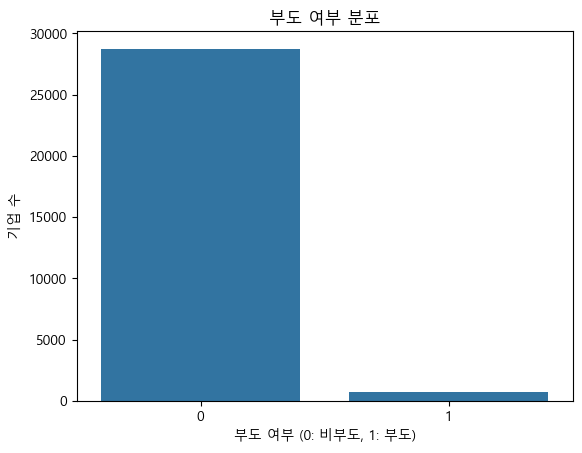

In [7]:
sns.countplot(x='모형개발용Performance(향후1년내부도여부)', data=df_reduced)
plt.title('부도 여부 분포')
plt.xlabel('부도 여부 (0: 비부도, 1: 부도)')
plt.ylabel('기업 수')
plt.show()

In [8]:
region_df = df_reduced.groupby(['시도명', '시군구명'])['모형개발용Performance(향후1년내부도여부)'] \
              .agg(['count', 'sum']) \
              .rename(columns={'count': '기업수', 'sum': '부도건수'})
region_df['부도율'] = (region_df['부도건수'] / region_df['기업수']).round(2)
pd.options.display.float_format = '{:.2f}'.format
region_df.sort_values('부도율', ascending=False).head(10)

,,기업수,부도건수,부도율
시도명,시군구명,,,
충남,서산시,2,2,1.00
전남,담양군,2,1,0.50
대구,달성군,28,8,0.29
충남,예산군,8,2,0.25
전남,광양시,15,3,0.20
부산,사상구,63,11,0.17
인천,중구,99,13,0.13
경기,평택시,446,60,0.13
전남,나주시,143,16,0.11


In [9]:
grade_df = df_reduced.groupby('기업신용평가등급(구간화)')['모형개발용Performance(향후1년내부도여부)'] \
             .agg(['count', 'sum']) \
             .rename(columns={'count': '기업수', 'sum': '부도건수'})
grade_df['부도율'] = (grade_df['부도건수'] / grade_df['기업수']).round(3)
grade_df.sort_index()

,기업수,부도건수,부도율
기업신용평가등급(구간화),,,
0,3,0,0.00
1,786,0,0.00
2,860,1,0.00
3,3093,0,0.00
4,6214,17,0.00
5,4808,77,0.02
6,6593,188,0.03
7,4880,227,0.05
8,1651,141,0.09


C:\Users\campus4D006\AppData\Local\Temp\ipykernel_21708\3568420239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_df.index, y=grade_df.values, palette='Blues_d')


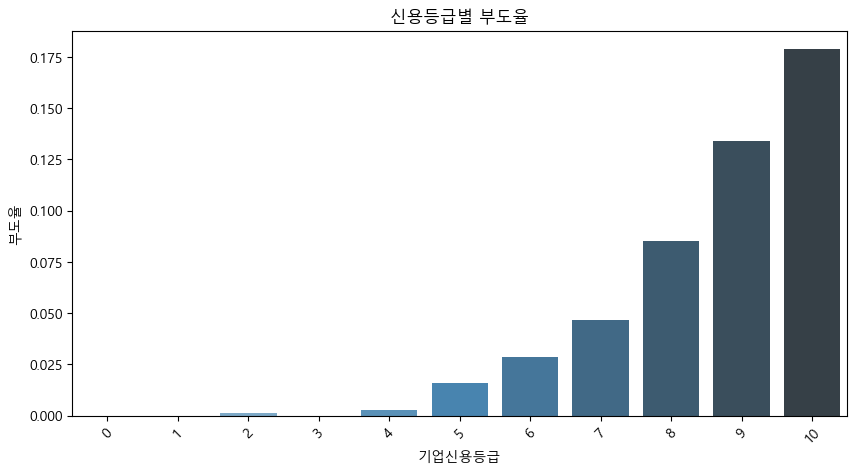

In [10]:
grade_df = df_reduced.groupby('기업신용평가등급(구간화)')['모형개발용Performance(향후1년내부도여부)'].mean().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=grade_df.index, y=grade_df.values, palette='Blues_d')
plt.title('신용등급별 부도율')
plt.xlabel('기업신용등급')
plt.ylabel('부도율')
plt.xticks(rotation=45)
plt.show()

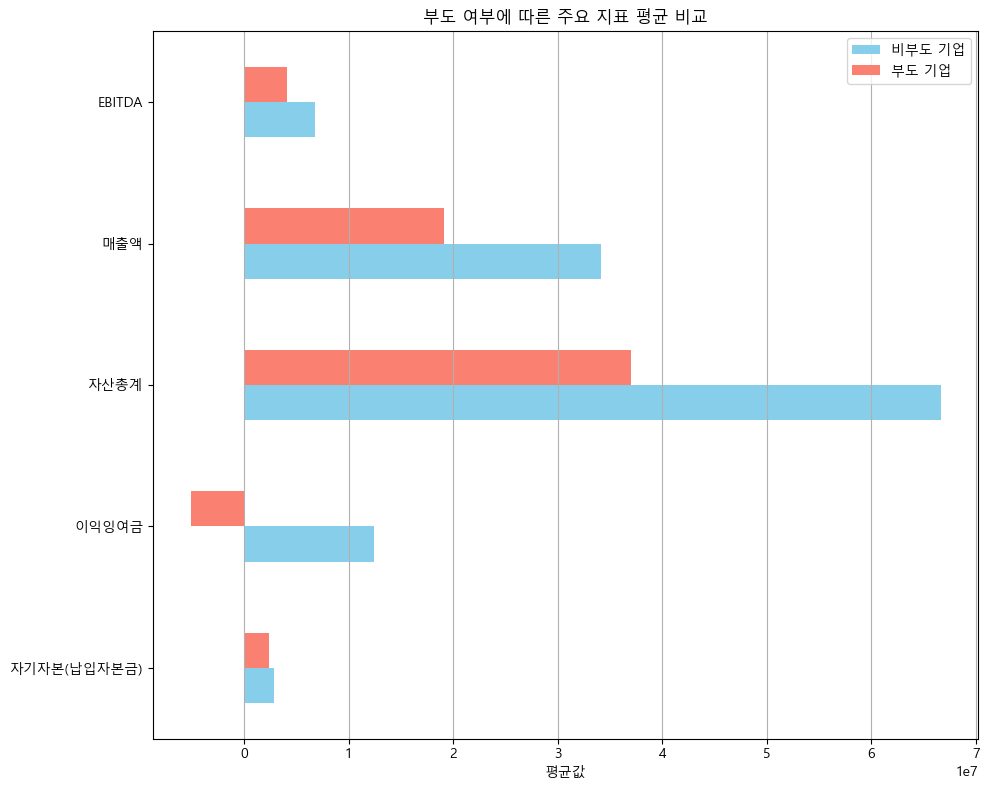

In [13]:
stability_cols = ['자기자본(납입자본금)', '이익잉여금', '자산총계']
scale_cols = ['매출액', 'EBITDA']
grade_col = '기업신용평가등급(구간화)'
target_col = '모형개발용Performance(향후1년내부도여부)'
compare_cols = stability_cols + scale_cols

eda_mean = df_reduced.groupby(target_col)[compare_cols].mean().T.round(1)
eda_mean.columns = ['비부도 기업', '부도 기업']

eda_mean.plot(kind='barh', figsize=(10, 8), color=['skyblue', 'salmon'])
plt.title('부도 여부에 따른 주요 지표 평균 비교')
plt.xlabel('평균값')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\campus4D006\AppData\Local\Temp\ipykernel_21708\1592420159.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_region.index, y=top10_region.values, palette='coolwarm')


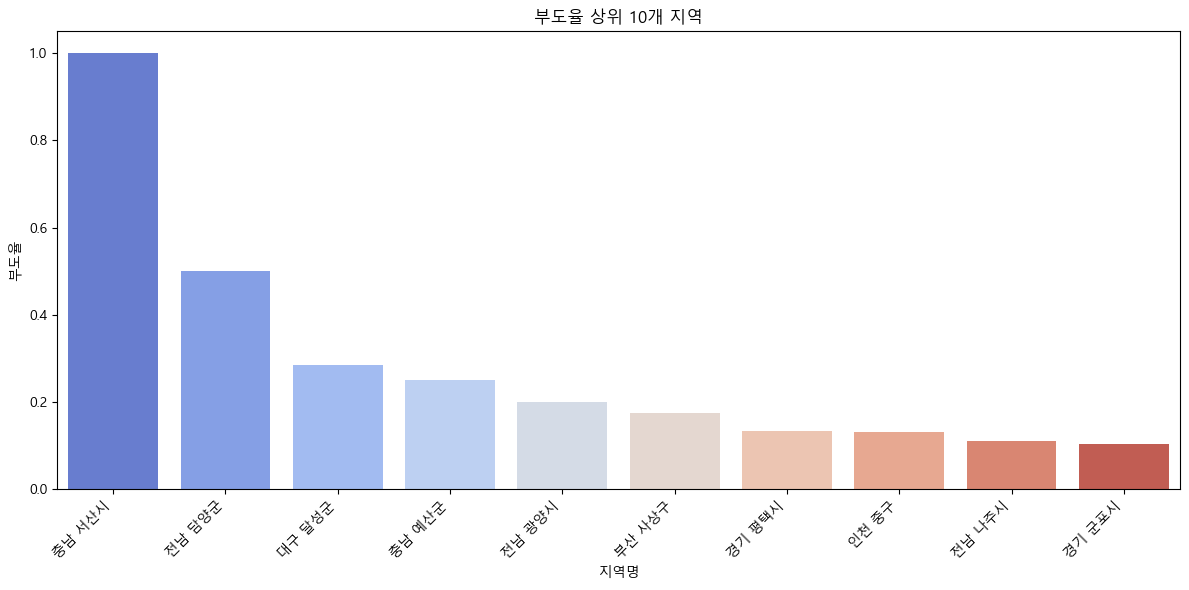

In [14]:
df_reduced['시도_시군구'] = df_reduced['시도명'] + ' ' + df_reduced['시군구명']
region_summary = df_reduced.groupby('시도_시군구')[target_col].mean()
top10_region = region_summary.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_region.index, y=top10_region.values, palette='coolwarm')
plt.title('부도율 상위 10개 지역')
plt.xticks(rotation=45, ha='right')
plt.ylabel('부도율')
plt.xlabel('지역명')
plt.tight_layout()
plt.show()

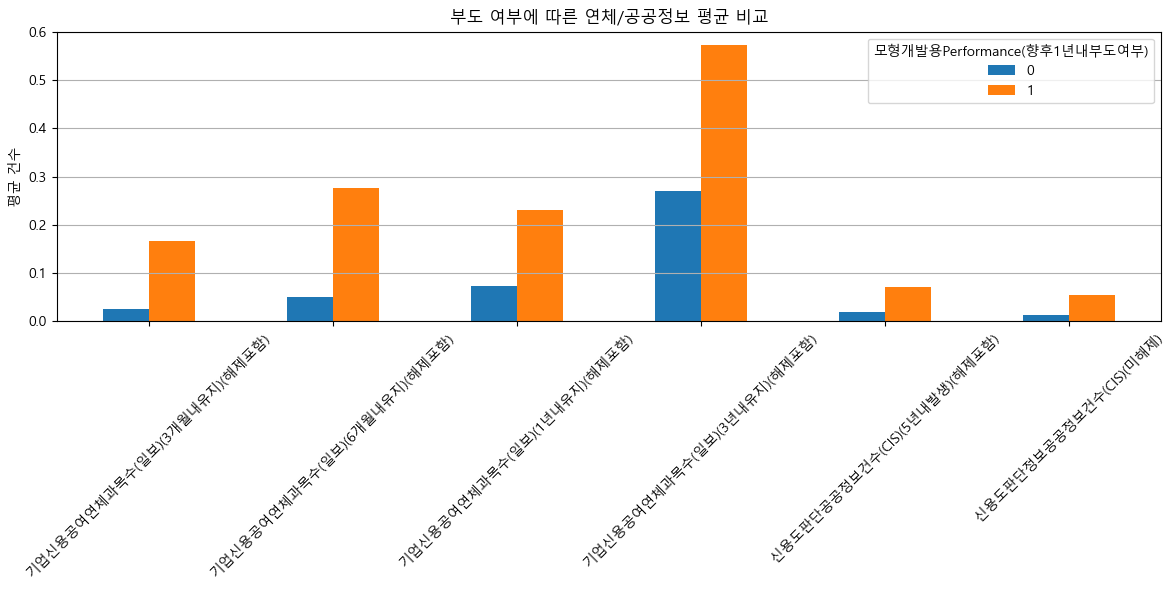

In [15]:
delay_cols = [
    '기업신용공여연체과목수(일보)(3개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(6개월내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(1년내유지)(해제포함)',
    '기업신용공여연체과목수(일보)(3년내유지)(해제포함)',
    '신용도판단공공정보건수(CIS)(5년내발생)(해제포함)',
    '신용도판단정보공공정보건수(CIS)(미해제)'
]

df_reduced.groupby('모형개발용Performance(향후1년내부도여부)')[delay_cols].mean().T.plot(kind='bar', figsize=(12,6))
plt.title('부도 여부에 따른 연체/공공정보 평균 비교')
plt.ylabel('평균 건수')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [25]:
df_reduced.groupby("모형개발용Performance(향후1년내부도여부)")["기업신용공여연체과목수(일보)(3개월내유지)(해제포함)"].mean().round(2)

모형개발용Performance(향후1년내부도여부)
0   0.03
1   0.17
Name: 기업신용공여연체과목수(일보)(3개월내유지)(해제포함), dtype: float64

In [26]:
df_reduced.groupby("모형개발용Performance(향후1년내부도여부)")["기업신용공여연체과목수(일보)(6개월내유지)(해제포함)"].mean().round(2)

모형개발용Performance(향후1년내부도여부)
0   0.05
1   0.28
Name: 기업신용공여연체과목수(일보)(6개월내유지)(해제포함), dtype: float64

In [27]:
df_reduced.groupby("모형개발용Performance(향후1년내부도여부)")["기업신용공여연체과목수(일보)(1년내유지)(해제포함)"].mean().round(2)

모형개발용Performance(향후1년내부도여부)
0   0.07
1   0.23
Name: 기업신용공여연체과목수(일보)(1년내유지)(해제포함), dtype: float64